# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60 / 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Thoughts before diving in
- The goal is to improve FoodHub's business.
- The business success metric is the margin of the delivery order from restaurants.
- Customer satisfaction must be the key leading indicator. So, understanding "rating" and its corelation with other factors would be important.
- Understanding the current revenue of restaurants would be important to plan promotions.
- Delivery person's satisfaction is also important for long-term success. We don't seem to have much information to understand that so far.


### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Mount Google Drive for Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('/content/drive/My Drive/Documents/Projects/ADSP/FoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
The dataset has 1898 rows (orders) and 9 columns (features).

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- `order_id` and `customer_id` are in integer type. They are identifiers of order entities and indivisuals who ordered, respectively.
- `restaurant_name`, `cuisine_type`, `day_of_the_week` are nominal variables and stored as objects.
- `rating` is in object type. There may be reasons: it may include some string values. However, we'd need some calculation on this column like mean rating for some orders. So, we should covert its type to integer.
- `food_preparation_time` and `delivery_time` are in integer type.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Write your code here
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There is no missing value in the data. But I observed in further analysis that `rating` field has values marked `'Not given'` which is not `NaN` per se but needs some treatment. I'll take care of that in later cells.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations:
We've got the descriptive statistics for both continous variable and categorial variables. The minimum, average, and maximum time for `food_preparation_time` are:
- Min: 20 min
- Average: 27.37 min
- Max: 35 min

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [9]:
df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

#### Observations:
736 orders are not rated, which is about 38.8% of the total. `rating` is a key variable that we need to understand. We need some treatment to the `'Not given'` entries. Its percentage is very high. So, imputing this value to certain other values would introduce a significant bias. I suggest we replace `'Not given'` with `np.nan` and convert the type of the field to float type. Pandas will exclude `np.nan` in the numeric calculation of the other `rating` values.

## Pre-processing
We'll do the following pre-processing to make our analysis more convenient and effective:
- Change `'Not given'` values in `rating` column to `np.nan`
- Add `restaurant_revenue`: introducing the revenue of each restaurant. I.e., the sum of `cost_of_the_order` instances for each restaurant
- Add `customer_total_spend`: introducing the total spend that each customer made. I.e., the sume of `cost_of_the_order` instances for each customer
- Add `total_time`: `food_preparation_time` + `delivery_time`

### Replace `rating`'s `'Not given'` values with `np.nan` and convert the type of `rating` to float for further analysis

In [10]:
# Replace 'Not given' with np.nan and covert the type of the column to float
df['rating'] = df['rating'].replace('Not given', np.nan).astype('float')

In [11]:
df['rating'].value_counts(dropna=False)

NaN    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

### Adding `restaurant_revenue` column
The sum of `cost_of_the_order` instances for each restaurant

In [12]:
df['restaurant_revenue'] = df.groupby('restaurant_name')['cost_of_the_order'].transform('sum')
df[['restaurant_name', 'restaurant_revenue']].sort_values(by='restaurant_revenue', ascending=False)

,restaurant_name,restaurant_revenue
949,Shake Shack,3579.53
842,Shake Shack,3579.53
1403,Shake Shack,3579.53
1399,Shake Shack,3579.53
161,Shake Shack,3579.53
...,...,...
1193,Market Table,6.79
1718,Wa Jeal,6.74
10,Big Wong Restaurant _¤¾Ñ¼,5.92
689,Cipriani Le Specialita,5.92


### Adding `customer_total_spend` column
The sum of `cost_of_the_order` instances for each customer

In [13]:
df['customer_total_spend'] = df.groupby('customer_id')['cost_of_the_order'].transform('sum')
df[['customer_id', 'customer_total_spend']].sort_values(by='customer_total_spend', ascending=False)

,customer_id,customer_total_spend
1483,52832,225.80
855,52832,225.80
526,52832,225.80
670,52832,225.80
1070,52832,225.80
...,...,...
1095,64754,5.34
1491,339144,5.05
1695,318665,4.90
390,50123,4.85


### Adding `total_time` column
For further analysis, adding a column that represents the total time to receive the order: `food_preparation_time` + `delivery_time`.

In [14]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df[['order_id', 'food_preparation_time', 'delivery_time', 'total_time']].sample(5)

,order_id,food_preparation_time,delivery_time,total_time
1893,1476701,31,17,48
1313,1478311,28,29,57
719,1477355,33,15,48
1401,1477172,33,27,60
235,1477765,29,19,48


In [15]:
# First 5 rows of updated dataset with the pre-process above
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,restaurant_revenue,customer_total_spend,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,37.49,63.97,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,485.09,12.08,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,217.31,12.23,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,1662.29,37.98,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,55.25,53.01,49


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### `order_id`
This is unique order IDs. It must be uniformly distributed identifiers.

The rate of unique order IDs: 1.0


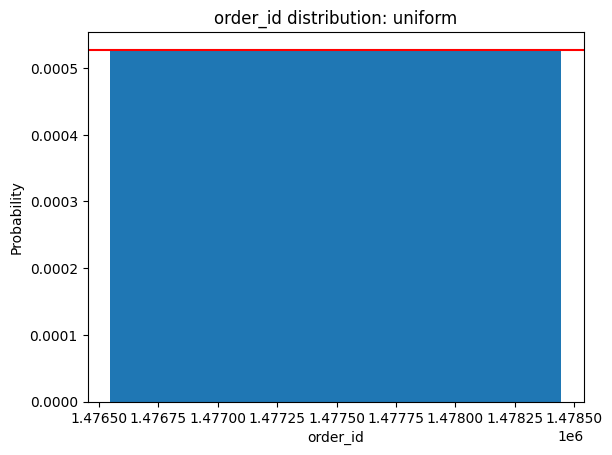

In [16]:
# Write the code here
print('The rate of unique order IDs: {}'.format(
    df['order_id'].nunique() / len(df['order_id']))
) # All the orders have unique order ids.
plt.hist(df['order_id'], density=True)
plt.axhline(1 / (df['order_id'].max() - df['order_id'].min()), color='r')
plt.title('order_id distribution: uniform')
plt.xlabel('order_id')
plt.ylabel('Probability')
plt.show()

### `customer_id`
This is customer IDs for the orders. There are customers who ordered mutliple times, maximum of 13 orders. However, 87.6% of the customers ordered once or twice.
- Thoughts: how can we make the existing customers order more frequently?

In [17]:
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

In [18]:
np.round((df['customer_id'].value_counts() < 3).mean(), 3) # % of customers ordered less than 3 times.

0.876

There are 1200 unique customers out of 1898 orders.


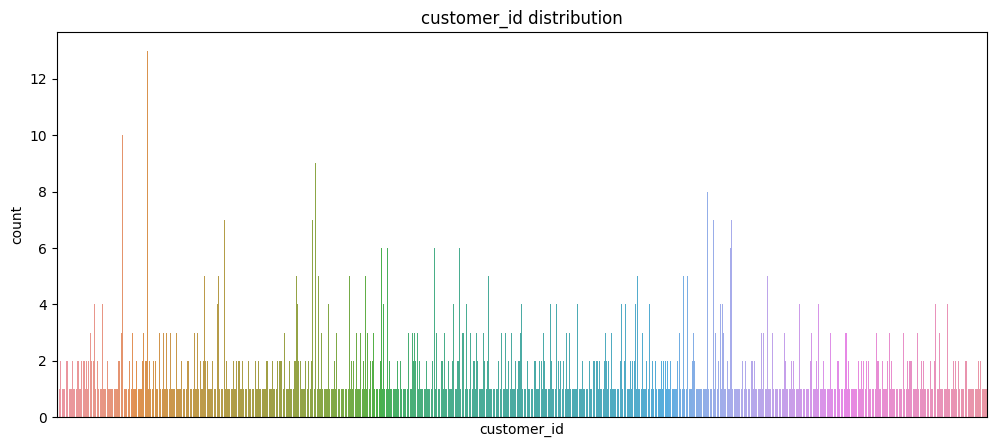

In [19]:
print('There are {} unique customers out of {} orders.'.format(
    df['customer_id'].nunique(), len(df['customer_id'])
)) # 1200 unique customers out of 1898 orders
plt.figure(figsize=(12,5))
sns.countplot(x='customer_id', data=df)
plt.title('customer_id distribution')
plt.xticks([]) # Intentionally hide x-tick marks
plt.show()

### `restaurant_name`
From the `df.describe(include='all')`, we know that:
- There are 178 unique restaurants.
- Shake Shack has the highest number of orders of 219.

In [20]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [21]:
np.round((df['restaurant_name'].value_counts() > 10).mean(), 3) # 22.5% of restaurants got more than 10 orders.

0.225

There are 178 unique restaurants.


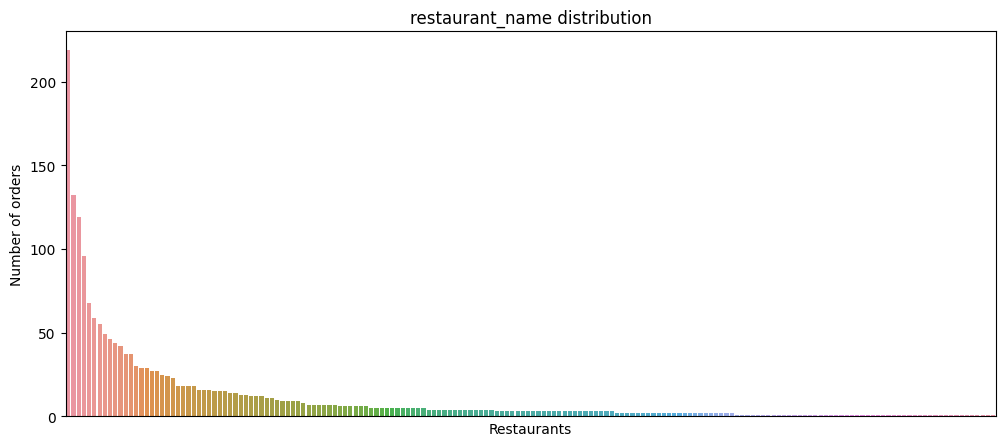

In [22]:
print('There are {} unique restaurants.'.format(
    df['restaurant_name'].nunique()
)) # 178 unique restaurants
order = df['restaurant_name'].value_counts().index
plt.figure(figsize=(12,5))
sns.countplot(x='restaurant_name', data=df, order=order)
plt.title('restaurant_name distribution')
plt.xticks([]) # Intentionally hide x-tick marks
plt.xlabel('Restaurants')
plt.ylabel('Number of orders')
plt.show()

### `cuisine_type`
From the `df.describe(include='all')`, we know that:
- There are 14 unique cuisine.
- American has the highest number of orders of 584.

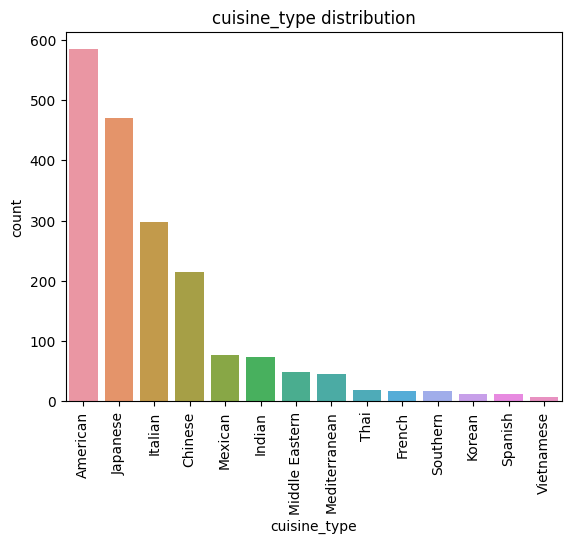

In [23]:
order = df['cuisine_type'].value_counts().index
sns.countplot(x='cuisine_type', data=df, order=order)
plt.title('cuisine_type distribution')
plt.xticks(rotation=90)
plt.show()

### `cost_of_the_order`
The cost of orders has:
- Mean: 16.5
- Standard deviation: 7.48
- Median: 14.14

There's no outlier presented in the box plot.

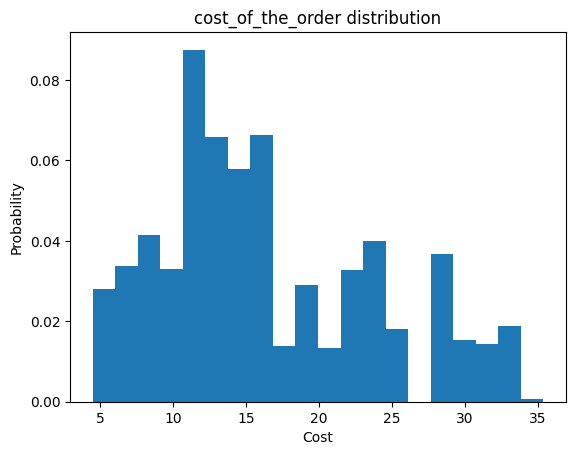

In [24]:
plt.hist(df['cost_of_the_order'], bins=20, density=True)
plt.title('cost_of_the_order distribution')
plt.xlabel('Cost')
plt.ylabel('Probability')
plt.show()

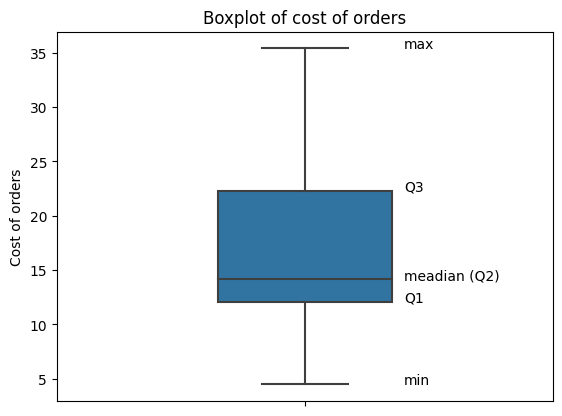

In [25]:
sns.boxplot(y='cost_of_the_order', data=df, width=.35)
plt.text(x = .2, y = df['cost_of_the_order'].min(), s ='min')
plt.text(x = .2, y = df['cost_of_the_order'].quantile(0.25), s ='Q1')
plt.text(x = .2, y = df['cost_of_the_order'].median(), s ='meadian (Q2)')
plt.text(x = .2, y = df['cost_of_the_order'].quantile(0.75), s ='Q3')
plt.text(x = .2, y = df['cost_of_the_order'].max(), s ='max')
plt.title('Boxplot of cost of orders')
plt.ylabel('Cost of orders')
plt.show()

### `day_of_the_week`
71.18% of the orders were made during weekends, which tells customers more frequently order foods for Staturday and Sunday than the other 5 weekdays.

In [26]:
df['day_of_the_week'].value_counts(normalize=True)

Weekend    0.711802
Weekday    0.288198
Name: day_of_the_week, dtype: float64

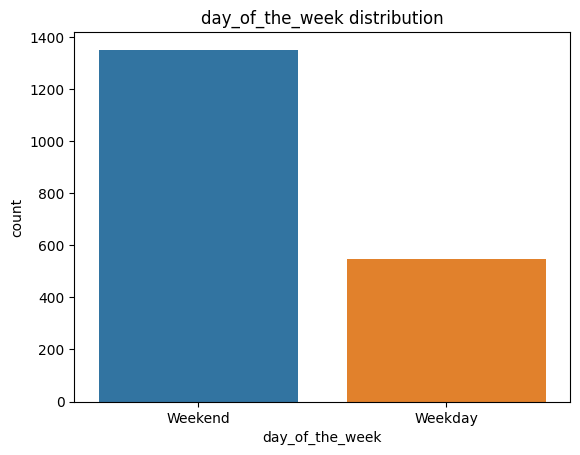

In [27]:
sns.countplot(x='day_of_the_week', data=df)
plt.title('day_of_the_week distribution')
plt.show()

### `rating`
Caveat: we decided to not impute the `'Not given'` values to not introduce bias. We just excluded 736 unrated orders (38.8% of total) from this analysis.

- 50.6% of the orders received 5 points
- 33.2% of the orders received 4 points
- 16.2% of the orders received 3 points

Mean value is 4.34 and median value is 5.

We'd need to drill down the cases with point 3 to understand the cause of the disatisfaction.

In [28]:
df['rating'].value_counts(normalize=True)

5.0    0.506024
4.0    0.332186
3.0    0.161790
Name: rating, dtype: float64

In [29]:
df['rating'].describe()

count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

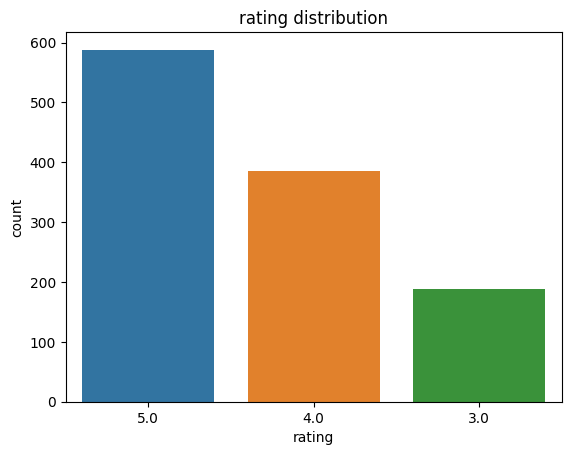

In [30]:
order = df['rating'].value_counts().index
sns.countplot(x='rating', data=df, order=order)
plt.title('rating distribution')
plt.show()

### `food_preparation_time`
The food preparation time has:
- Mean: 27.37
- Standard deviation: 4.63
- Median: 27.0

There's no outlier presented in the box plot.

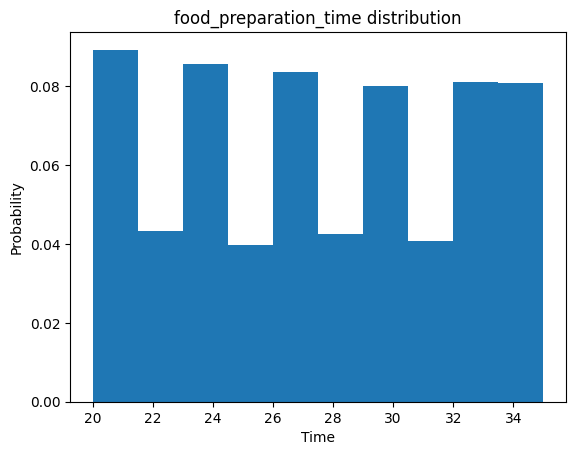

In [31]:
plt.hist(df['food_preparation_time'], density=True)
plt.title('food_preparation_time distribution')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.show()

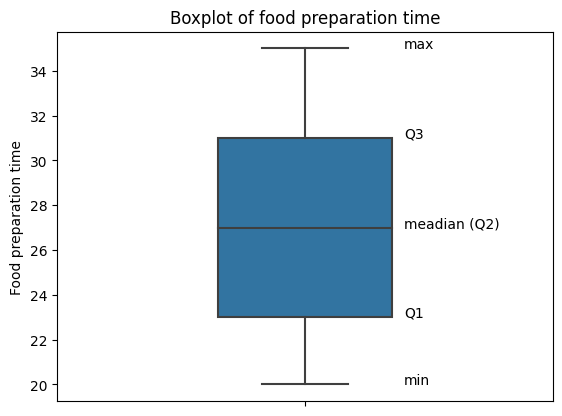

In [32]:
sns.boxplot(y='food_preparation_time', data=df, width=.35)
plt.text(x = .2, y = df['food_preparation_time'].min(), s ='min')
plt.text(x = .2, y = df['food_preparation_time'].quantile(0.25), s ='Q1')
plt.text(x = .2, y = df['food_preparation_time'].median(), s ='meadian (Q2)')
plt.text(x = .2, y = df['food_preparation_time'].quantile(0.75), s ='Q3')
plt.text(x = .2, y = df['food_preparation_time'].max(), s ='max')
plt.title('Boxplot of food preparation time')
plt.ylabel('Food preparation time')
plt.show()

### `delivery_time`
The delivery time has:
- Mean: 24.16
- Standard deviation: 4.97
- Median: 25.0

There's no outlier presented in the box plot.

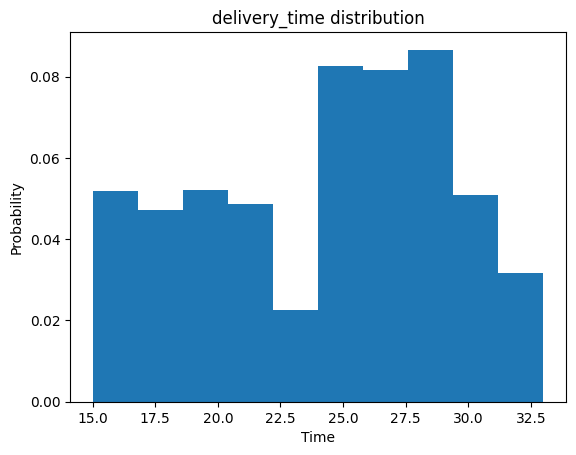

In [33]:
plt.hist(df['delivery_time'], density=True)
plt.title('delivery_time distribution')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.show()

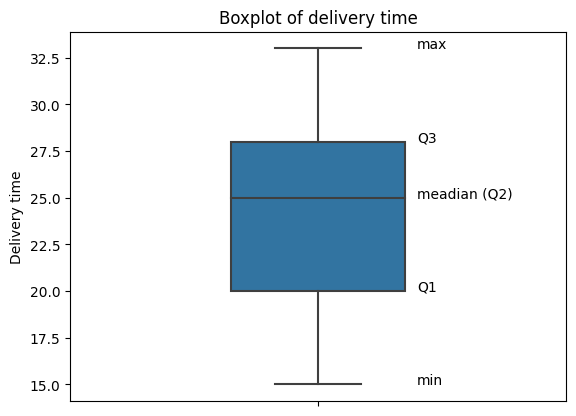

In [34]:
sns.boxplot(y='delivery_time', data=df, width=.35)
plt.text(x = .2, y = df['delivery_time'].min(), s ='min')
plt.text(x = .2, y = df['delivery_time'].quantile(0.25), s ='Q1')
plt.text(x = .2, y = df['delivery_time'].median(), s ='meadian (Q2)')
plt.text(x = .2, y = df['delivery_time'].quantile(0.75), s ='Q3')
plt.text(x = .2, y = df['delivery_time'].max(), s ='max')
plt.title('Boxplot of delivery time')
plt.ylabel('Delivery time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [35]:
# Write the code here
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Top 5 restaurants by the (number of orders) received:
1. Shake Shack (219)
1. The Meatball Shop (132)
1. Blue Ribbon Sushi (119)
1. Blue Ribbon Fried Chicken (96)
1. Parm (68)

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [36]:
# Write the code here
df_weekend = df[df['day_of_the_week'] == 'Weekend'] # Orders made over weekends
df_weekend['cuisine_type'].value_counts().head(1) # cuisine_type that has the most order among them

American    415
Name: cuisine_type, dtype: int64

In [37]:
df.query('day_of_the_week == "Weekend"')['cuisine_type'].value_counts().head(1) # Just a practice with .query method

American    415
Name: cuisine_type, dtype: int64

#### Observations:
American cuisine ranked at the number one spot, having gotten 415 orders over weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [38]:
# Write the code here
(df['cost_of_the_order'] > 20.).mean() # Calculate the proportion of the orders cost more than 20 dollars out of total rows

0.2924130663856691

#### Observations:
About 29.2% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [39]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 min.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [40]:
# Write the code here
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

In [41]:
# See how much they spent
df[df['customer_id'].isin([52832, 47440, 83287])] \
                    .groupby('customer_id')['cost_of_the_order'] \
                    .sum() \
                    .sort_values(ascending=False)

customer_id
52832    225.80
47440    158.18
83287    139.31
Name: cost_of_the_order, dtype: float64

#### Observations:
The top 3 most frequent customers and (their number of orders) are:
1. 52832 (13)
1. 47440 (10)
1. 83287 (9)

We should give the 20% discount vouchers to the above top 3 most frequent customers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Let's start with a pairplot to see if correlations stand out

In [42]:
# Write the code here
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### Observations:
The pairplot does not reveal any strong correlations between variables as-is. We can spot some customers who spent more than others from the added column `customer_total_spend` vs `customer_id`.

In [43]:
numerical_columns = ['cost_of_the_order', 'restaurant_revenue', 'customer_total_spend', 'rating', 'total_time'] # except order_id and customer_id
corr_matrix = df[numerical_columns].corr()
corr_matrix

,cost_of_the_order,restaurant_revenue,customer_total_spend,rating,total_time
cost_of_the_order,1.000000,-0.006457,0.245805,0.033983,0.006358
restaurant_revenue,-0.006457,1.000000,-0.057115,-0.036356,0.050570
customer_total_spend,0.245805,-0.057115,1.000000,0.002386,-0.009737
rating,0.033983,-0.036356,0.002386,1.000000,-0.011348
total_time,0.006358,0.050570,-0.009737,-0.011348,1.000000


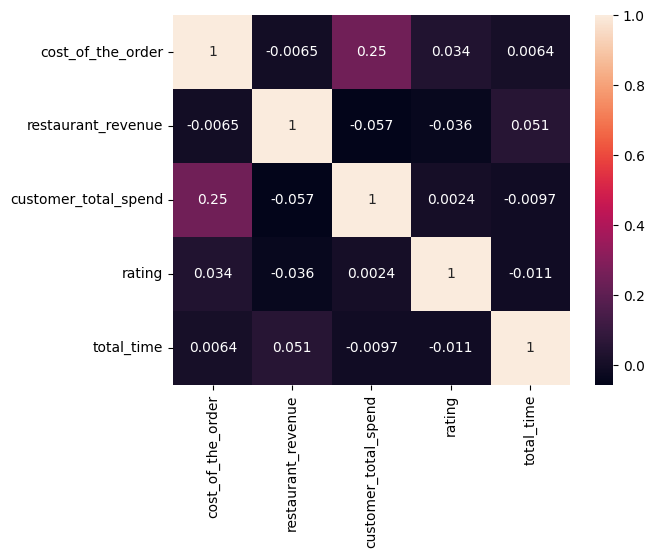

In [44]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### Observations:
The correlation heatmap does not reveal any strong correlations between the selected numerical variables as-is. We should get into indivisual multivariate analysis and feature engineering more.

### Revenue by restaurants
Restaurants revenue would directly affect FoodHub's margin. Let's look into the relationship between restaurants and the sum of their cost of the orders.

In [45]:
# Let's look into the 25% top revenue restaurants
revenue_threshold = df.groupby('restaurant_name')['cost_of_the_order'].sum().quantile(.75)
df_top_restaurants = df[df['restaurant_revenue'] > revenue_threshold].sort_values(by='restaurant_revenue', ascending=False)
print('The number of restaurants with the top 25% revenue: {}'.format(df_top_restaurants['restaurant_name'].nunique()))

The number of restaurants with the top 25% revenue: 45


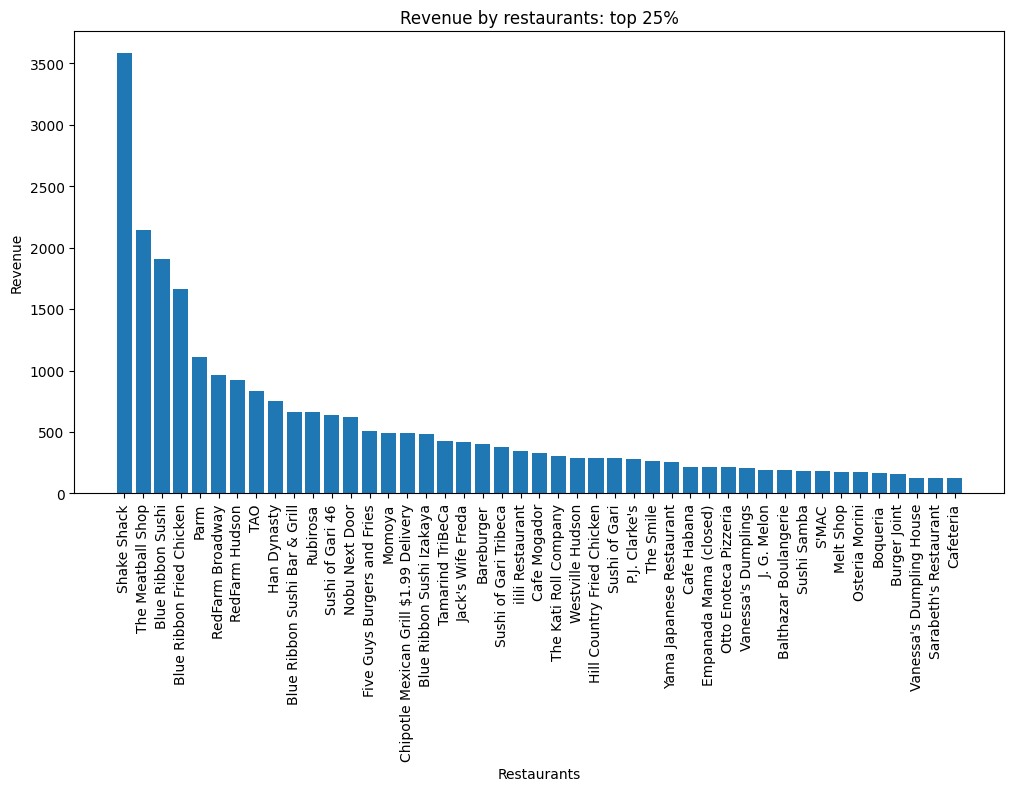

In [46]:
# A bar plot of the 45 (top 25% revenue) restaurants in sorted order
plt.figure(figsize=(12, 6))
plt.bar(x='restaurant_name', height='restaurant_revenue', data=df_top_restaurants)
plt.title('Revenue by restaurants: top 25%')
plt.xlabel('Restaurants')
plt.tick_params(axis='x', rotation=90, labelsize=10)
plt.ylabel('Revenue')
plt.show()

### Mean rating for the top 25% revenue restaurants
Caveat: we cacluated and used the mean rating from the data. However, for more accurate analysis, we'll need to introduce some weight rating values. We'll take that as our future work.

In [47]:
df_top_restaurants['mean_rating'] = df_top_restaurants.groupby('restaurant_name')['rating'].transform('mean')

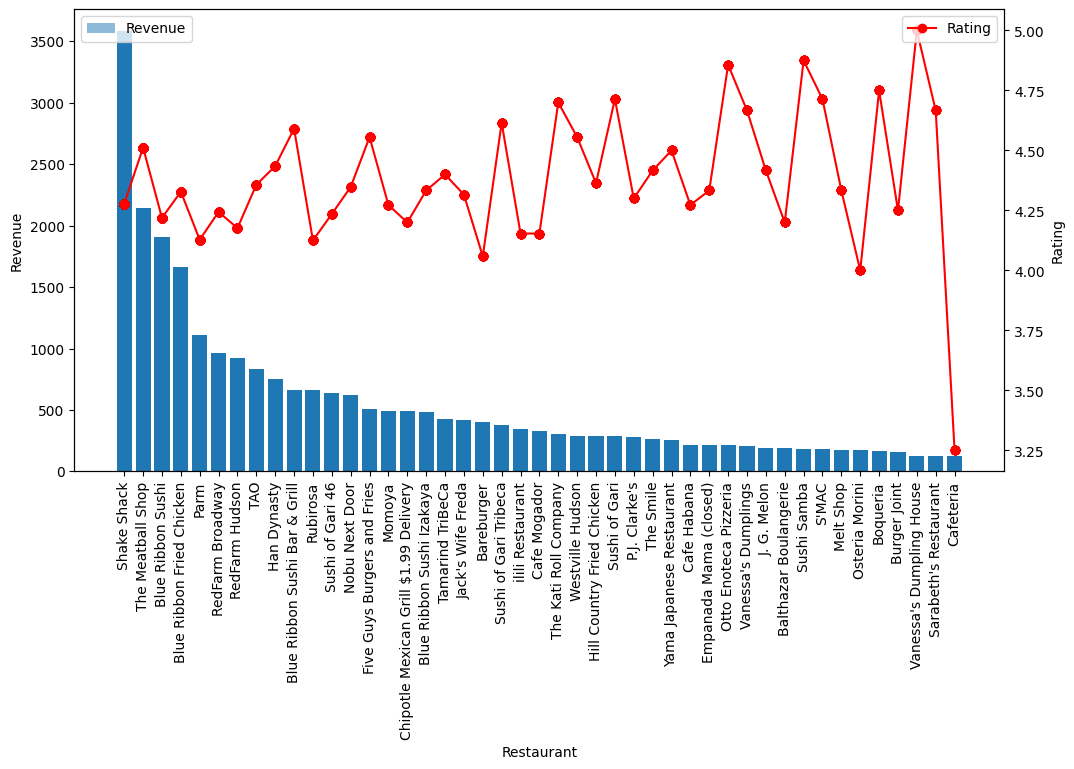

In [48]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(x='restaurant_name', height='restaurant_revenue', data=df_top_restaurants, alpha=0.5)
ax1.set_ylabel('Revenue')
ax2 = ax1.twinx()
ax2.plot(df_top_restaurants['restaurant_name'], df_top_restaurants['mean_rating'], color='red', marker='o')
ax2.set_ylabel('Rating')
uniqune_restaurant_name = df_top_restaurants[~df_top_restaurants['restaurant_name'].duplicated()]['restaurant_name']
ax1.set_xticks(range(45))
ax1.set_xticklabels(labels=uniqune_restaurant_name, rotation=90)
ax1.set_xlabel('Restaurant')
ax1.legend(['Revenue'], loc='upper left')
ax2.legend(['Rating'], loc='upper right')
plt.show()

### Observation
There are restaurants that show a high rating but made relatively low revenue. We may need to help them exposed more.

### Loyal customers
FoodHub needs to understand who the top loyal customers are and give them promotional benefits.

In [49]:
# Let's look into the 5% top spending customers
spend_threshold = df.groupby('customer_id')['cost_of_the_order'].sum().quantile(.95)
df_top_customers = df[df['customer_total_spend'] > spend_threshold].sort_values(by='customer_total_spend', ascending=False)
df_top_customers['customer_id'].nunique()

60

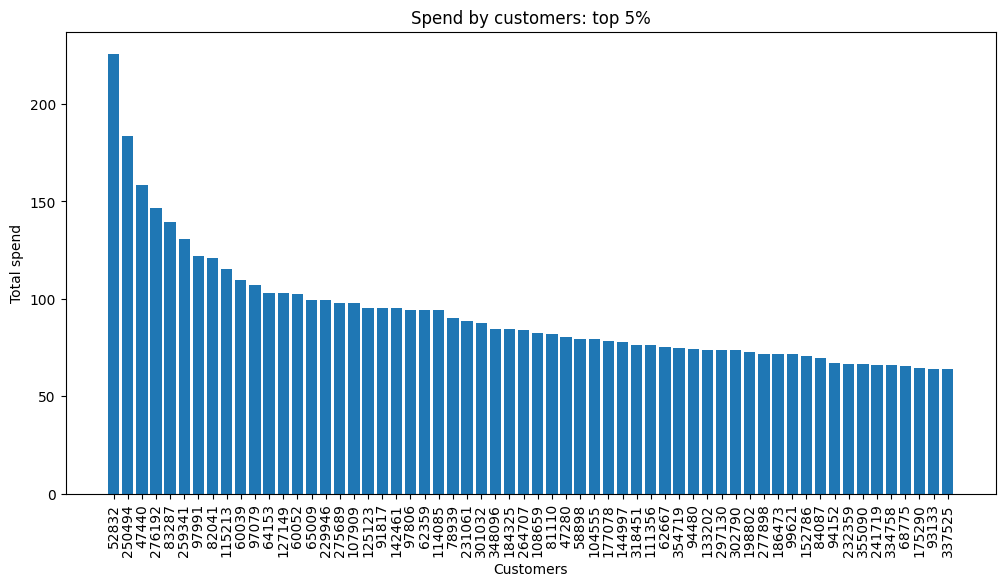

In [50]:
df_top_customers['customer_id'] = df_top_customers['customer_id'].astype('str')
plt.figure(figsize=(12, 6))
plt.bar(x='customer_id', height='customer_total_spend', data=df_top_customers)
plt.title('Spend by customers: top 5%')
plt.xlabel('Customers')
plt.tick_params(axis='x', rotation=90, labelsize=10)
plt.ylabel('Total spend')
plt.show()

### Mean rating from the top 5% customers
These are the top 5% customers who spent the most. Their voices should matter. We should understand what we can improve from their feedback through some surveys.

In [51]:
df_top_customers['mean_rating'] = df_top_customers.groupby('customer_id')['rating'].transform('mean')

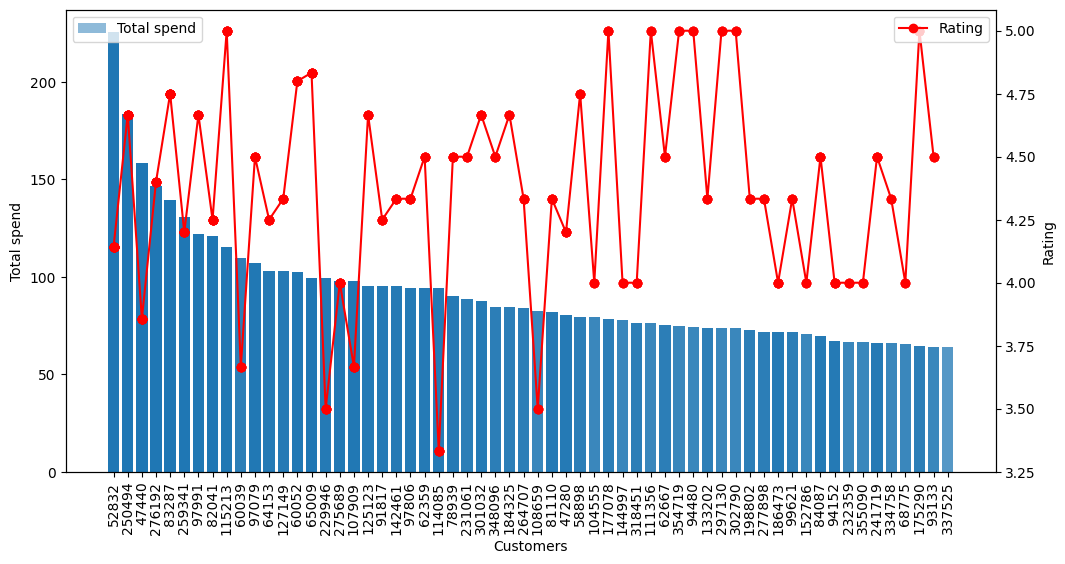

In [52]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(x='customer_id', height='customer_total_spend', data=df_top_customers, alpha=0.5)
ax1.set_ylabel('Total spend')
ax2 = ax1.twinx()
ax2.plot(df_top_customers['customer_id'], df_top_customers['mean_rating'], color='red', marker='o')
ax2.set_ylabel('Rating')
uniqune_customer_id = df_top_customers[~df_top_customers['customer_id'].duplicated()]['customer_id']
ax1.set_xticks(range(60))
ax1.set_xticklabels(labels=uniqune_customer_id, rotation=90)
ax1.set_xlabel('Customers')
ax1.legend(['Total spend'], loc='upper left')
ax2.legend(['Rating'], loc='upper right')
plt.show()

### Loyal customer's pattern of order by day of the week
Interestingly, there are customers who order more on weekends and who order more on weekdays. For these top customers, we should plan some vouchers in the right time depending on their indivisual patterns.

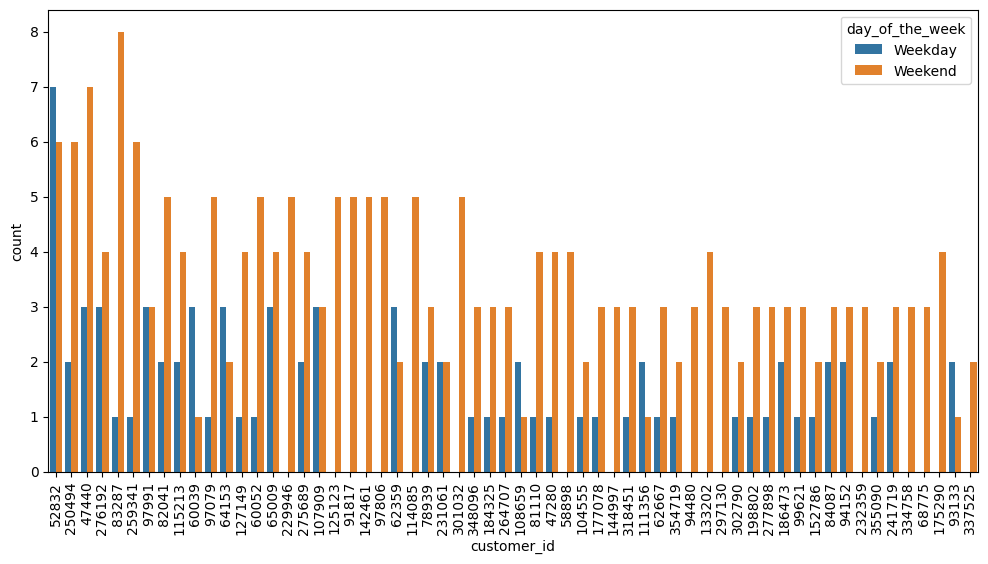

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(x='customer_id', data=df_top_customers, hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

### Loyal customer's pattern of order by restaurants
We can spot some patterns which restaurants our loyal customers like the most. We can use this information to provide more effective vouchers to the customers.

In [54]:
# First 5 rows of the orders from the top 5% customers
df_top_customers.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,restaurant_revenue,customer_total_spend,total_time,mean_rating
272,1477314,52832,ilili Restaurant,Middle Eastern,9.46,Weekday,4.0,25,25,343.22,225.8,50,4.142857
526,1478160,52832,Donburi-ya,Japanese,15.86,Weekday,5.0,28,28,75.53,225.8,56,4.142857
855,1477041,52832,Junoon,Indian,25.17,Weekday,NaN,23,24,115.25,225.8,47,4.142857
1768,1477075,52832,ilili Restaurant,Middle Eastern,31.43,Weekday,3.0,26,29,343.22,225.8,55,4.142857
670,1477302,52832,Don's Bogam BBQ & Wine Bar,Korean,12.23,Weekend,NaN,32,20,38.91,225.8,52,4.142857


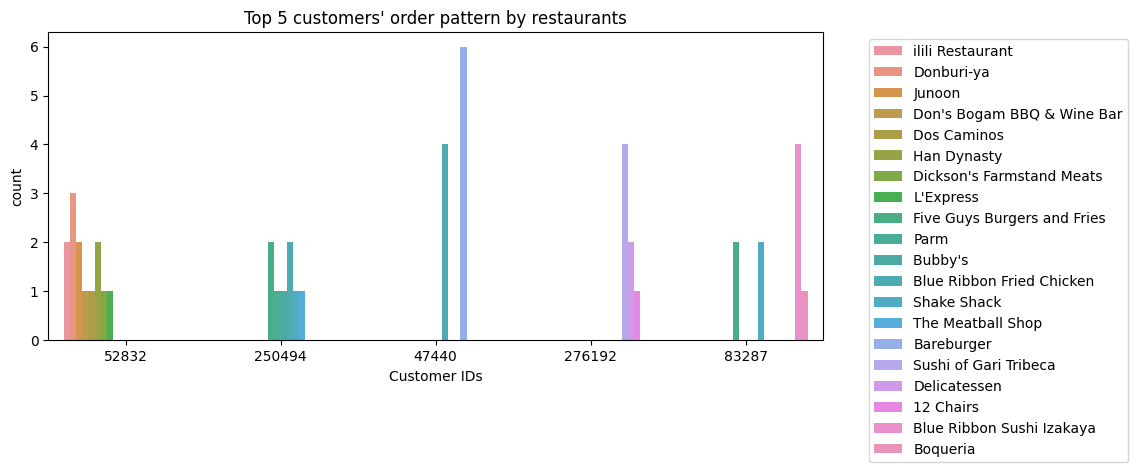

In [55]:
top_5_customers = df_top_customers[~df_top_customers['customer_id'].duplicated()] \
    .sort_values(by='customer_total_spend', ascending=False)['customer_id'].head(5)
df_top_5_customers = df_top_customers[df_top_customers['customer_id'].isin(top_5_customers)]
df_top_5_customers
plt.figure(figsize=(10, 4))
sns.countplot(x='customer_id', data=df_top_5_customers, hue='restaurant_name')
plt.title('Top 5 customers\' order pattern by restaurants')
plt.xlabel('Customer IDs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Loyal customer's pattern of order by cuisine
We may acquire more restaurants that serve the type of cuisines.

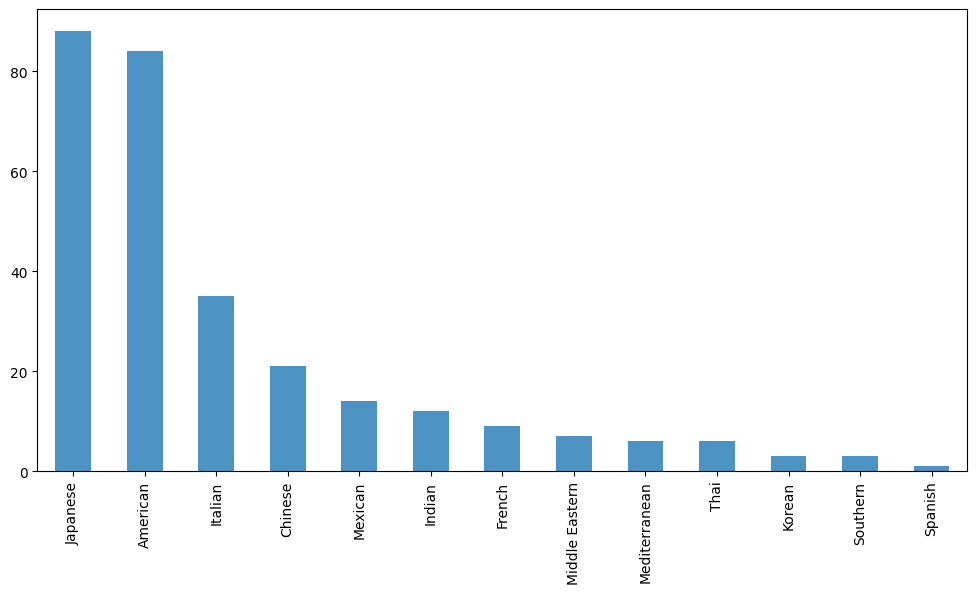

In [56]:
plt.figure(figsize=(12, 6))
df_top_customers['cuisine_type'].value_counts().plot(kind='bar', alpha=.8)
plt.show()

### Additional exploration

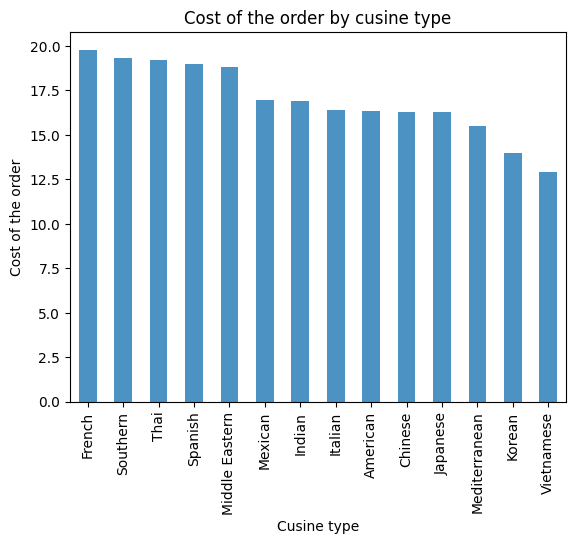

In [57]:
# Cuisine type vs cost of the order
ax = df.groupby('cuisine_type')['cost_of_the_order'].mean(). \
    sort_values(ascending=False).plot(kind='bar', alpha=.8)
ax.set_title('Cost of the order by cusine type')
ax.set_xlabel('Cusine type')
ax.set_ylabel('Cost of the order')
plt.show()

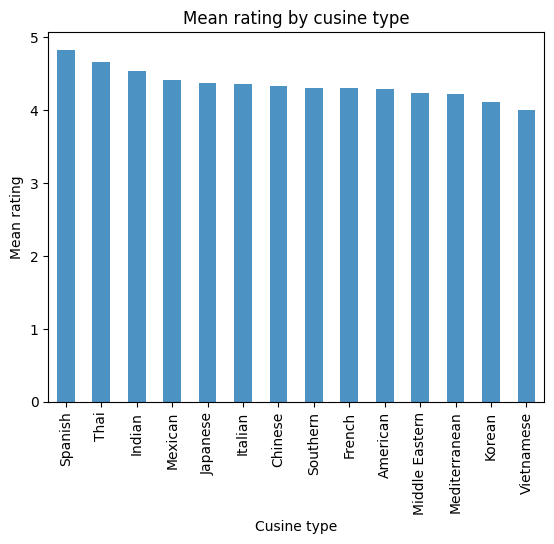

In [58]:
# Cuisine type vs mean rating
ax = df.groupby('cuisine_type')['rating'].mean() \
                                         .sort_values(ascending=False) \
                                         .plot(kind='bar', alpha=.8)
ax.set_title('Mean rating by cusine type')
ax.set_xlabel('Cusine type')
ax.set_ylabel('Mean rating')
plt.show()

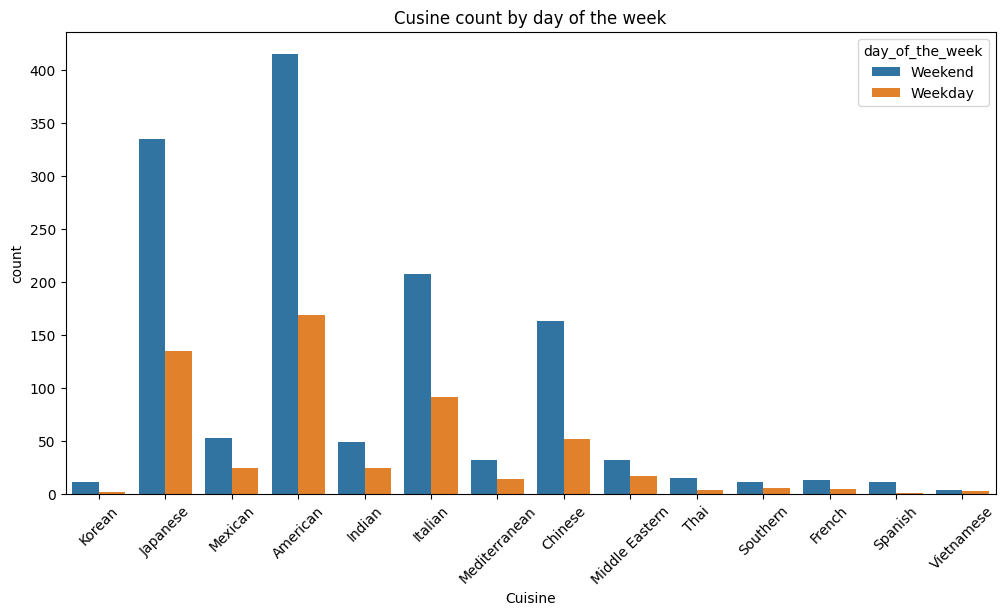

In [59]:
# Cusine count by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='cuisine_type', data=df, hue='day_of_the_week')
plt.title('Cusine count by day of the week')
plt.xticks(rotation=45)
plt.xlabel('Cuisine')
plt.show()

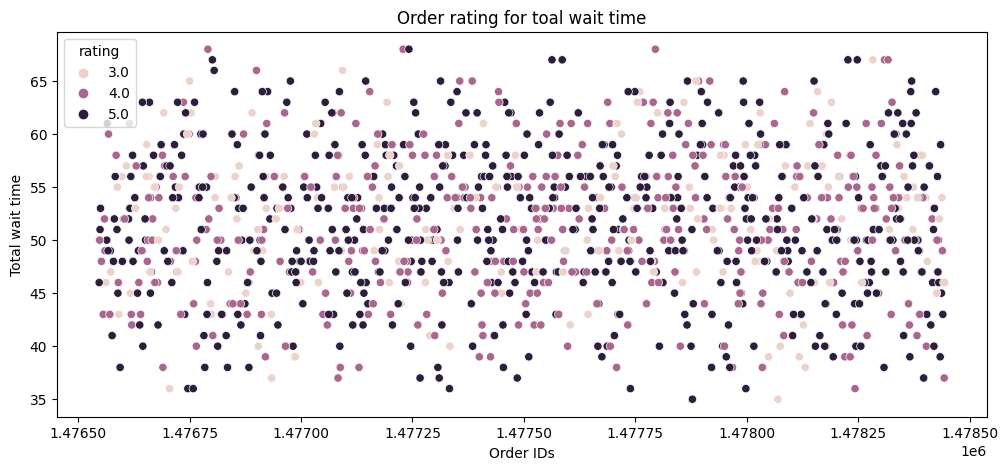

In [60]:
# Order rating for total wait time
plt.figure(figsize=(12, 5))
sns.scatterplot(x='order_id', y='total_time', hue='rating', data=df)
plt.title('Order rating for toal wait time')
plt.xlabel('Order IDs')
plt.ylabel('Total wait time')
plt.show()

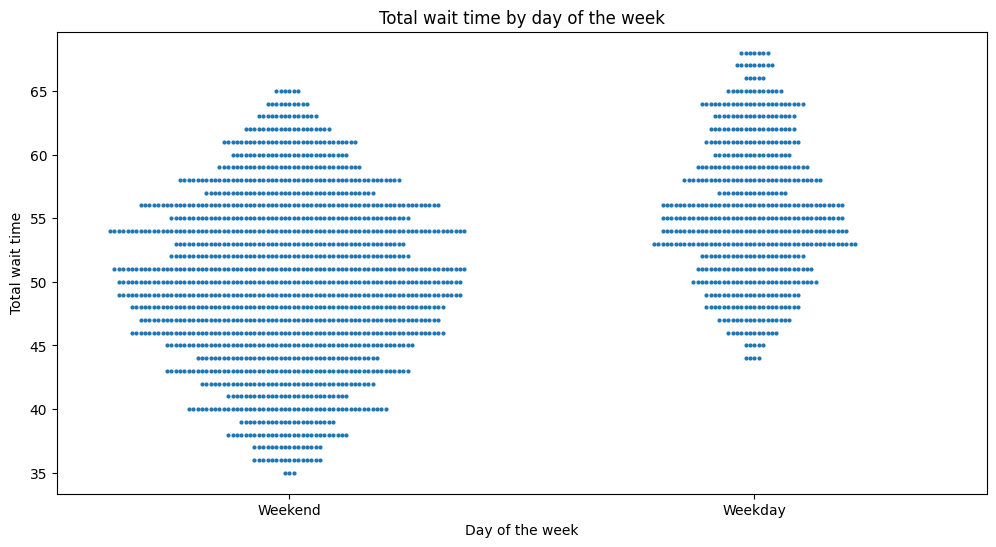

In [61]:
# Total wait time by day of the week
plt.figure(figsize=(12, 6))
sns.swarmplot(x='day_of_the_week', y='total_time', data=df, size=3)
plt.title('Total wait time by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Total wait time')
plt.show()

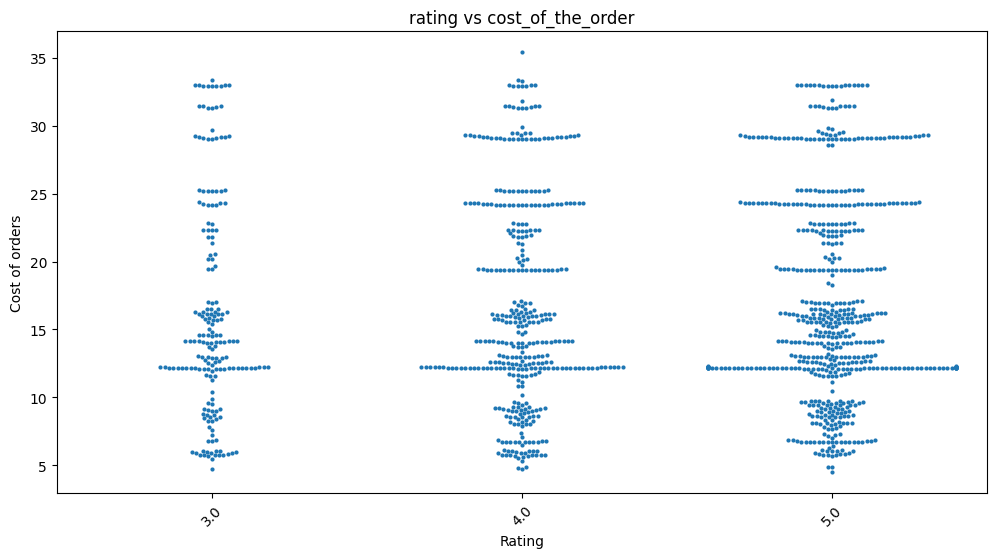

In [62]:
# Cost of orders by rating
plt.figure(figsize=(12, 6))
df_exclude_nan = df[df['rating'].notna()]
sns.swarmplot(x='rating', y='cost_of_the_order', data=df_exclude_nan, size=3)
plt.title('rating vs cost_of_the_order')
plt.xticks(rotation=45) # Intentionally hide x-ticks
plt.xlabel('Rating')
plt.ylabel('Cost of orders')
plt.show()

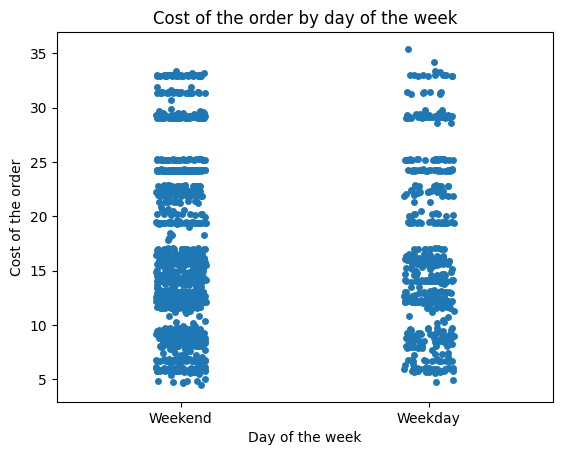

In [63]:
# Cost of the order by day of the week
sns.stripplot(x='day_of_the_week', y='cost_of_the_order', data=df, jitter=True)
plt.title('Cost of the order by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Cost of the order')
plt.show()

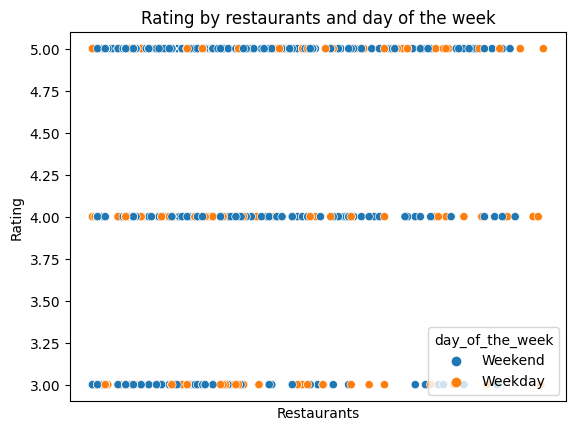

In [64]:
# Rating by restaurants and day of the week
sns.scatterplot(x='restaurant_name', y='rating', hue='day_of_the_week', data=df)
plt.title('Rating by restaurants and day of the week')
plt.xticks([]) # Intentionally hide x-ticks
plt.xlabel('Restaurants')
plt.ylabel('Rating')
plt.show()

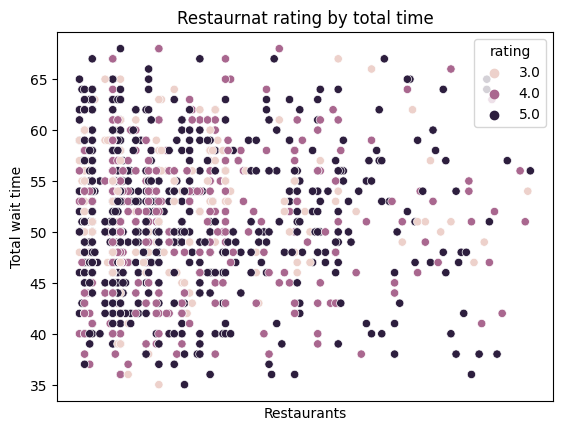

In [65]:
# Restaurnat rating by total time
sns.scatterplot(x='restaurant_name', y='total_time', data=df, hue='rating')
plt.title('Restaurnat rating by total time')
plt.xticks([]) # Intentially hide xlabels
plt.xlabel('Restaurants')
plt.ylabel('Total wait time')
plt.show()

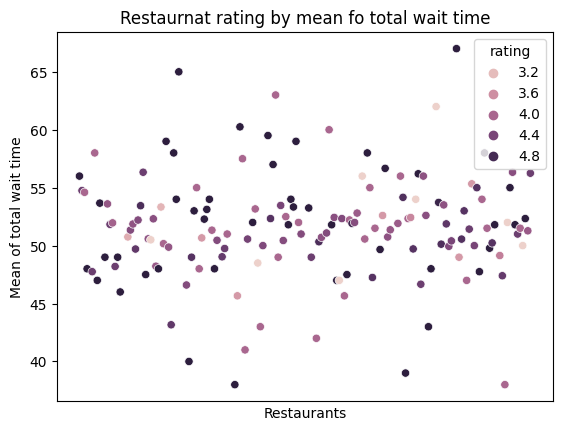

In [66]:
# Restaurnat rating by mean total time
df_mean_rating_time = df.groupby('restaurant_name')[['rating', 'total_time']].mean()
sns.scatterplot(x='restaurant_name', y='total_time', data=df_mean_rating_time, hue='rating')
plt.title('Restaurnat rating by mean fo total wait time')
plt.xticks([]) # Intentially hide xlabels
plt.xlabel('Restaurants')
plt.ylabel('Mean of total wait time')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [67]:
# Write the code here
df_rated = df[df['rating'].notna()] # Get the rows that have not null rating values.
df_rated

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,restaurant_revenue,customer_total_spend,total_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,217.31,12.23,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,1662.29,37.98,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,55.25,53.01,49
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24,426.71,47.58,44
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30,74.95,5.97,63
...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3.0,33,30,965.13,67.22,63
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5.0,20,22,834.50,40.94,42
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17,491.69,22.31,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19,262.28,12.18,50


In [68]:
# Get the rating count and mean values per restaurant
df_rate_stats = df_rated.groupby('restaurant_name')['rating'] \
                        .agg(['count', 'mean'])
# Filter the restaurants that have a rating count of more than 50 and the average rating greater than 4
df_rate_stats[(df_rate_stats['count'] > 50) & (df_rate_stats['mean'] > 4.)] \
    .sort_values(by=['mean', 'count'], ascending=False)

,count,mean
restaurant_name,,
The Meatball Shop,84,4.511905
Blue Ribbon Fried Chicken,64,4.328125
Shake Shack,133,4.278195
Blue Ribbon Sushi,73,4.219178


#### Observations:
There are 4 restaurants below that meet the criteria for the promotional offer:
- The Meatball Shop: avg 4.51 from 84 ratings
- Blue Ribbon Fried Chicken: avg 4.33 from 64 ratings
- Shake Shack: avg 4.28 from 133 ratings
- Blue Ribbon Sushi: avg 4.22 from 73 ratings

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [69]:
# Write the code here
charge_sum_by_25 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * .25
charge_sum_by_15 = \
    df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'] \
    .sum() * .15
print(f'The net revenue of FoodHub is {np.round(charge_sum_by_25 + charge_sum_by_15, 2)}')

The net revenue of FoodHub is 6166.3


#### Observations:
The net revenue of FoodHub is 6,166.3.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [70]:
# Write the code here
np.round((df['food_preparation_time'] + df['delivery_time'] > 60).mean(), 4)

0.1054

#### Observations:
10.54% of the orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [71]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery time for weekdays is 28.34 min whereas the mean delivery time for weekend is 22.47 min.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Through the analysis of the dataset, we have gained a robust understanding of the business status and identified potential areas for improvement. However, we also recognized the need for more granular data for further analysis, such as more rating entries, more precise order dates, distances between customers and restaurants, delivery routes, and delivery personnel's feedback. Based on the conducted analysis, we offer the following summary and recommendations:

**Summary**
1. There are 1,200 unique customers. Some are loyal, with multiple orders (up to 13) and high spending (up to \$225.80). However, 87.6% of customers ordered only once or twice.
2. We observed patterns indicating the favorite restaurants of our loyal customers. This information can help in offering more effective vouchers to the customers.
3. Some customers order more on weekends, while others order more on weekdays. For top customers, we should time vouchers appropriately based on their individual ordering patterns.
4. There are 178 unique restaurants. The top 25% of revenue is accounted for by 45 restaurants.
5. Some restaurants have high ratings but relatively low revenue. These restaurants may need more exposure.
6. There are 14 unique cuisine types served. The most ordered are American, Japanese, and Italian. For the top 5% of customers by expenditure, Japanese cuisine is the most popular, but those three cuisine types remain in the top three.
7. The average order cost is \$16.50, with a standard deviation of \$7.48 and a median of $14.14. The distribution is slightly right-skewed but has no significant outliers.
8. 71.18% of orders were placed during weekends.
9. Total wait time and rating do not show any meaningful correlation.

### Recommendations:
1. Highlight top revenue-generating restaurants in advertisements and promotional offers.
2. Reach out to restaurants with high ratings but low revenue. These restaurants show potential and may be good partners for co-promotions to foster mutual growth.
3. Provide vouchers to top loyal customers based on their ordering patterns, considering their favorite restaurants and the day of the week.
4. Plan promotions targeting customers who gave high ratings but did not order frequently.
5. Engage with loyal customers who left low ratings. Their feedback is vital, and understanding their concerns can guide us in improving our service.
6. Improve the customer feedback rate as 38.8% of orders were not rated. Rating is an essential metric.
7. Investigate why highly-rated cuisines like Spanish, Thai, and Indian are not ordered more frequently.
8. Foster partnerships with restaurants offering popular cuisine types and explore reasons behind the lack of popularity of certain cuisines.
9. As there is no significant correlation between wait time and customer satisfaction, contrary to common sense, gather more data such as customer-restaurant distance to gain further insights.
10. Collect more data about delivery personnel. They are a critical part of the business, and understanding their challenges can help improve customer satisfaction.